In [1]:
import os
import urllib # 웹에서 데이터 다운할때 서용
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 세그멘테이션(Segmentation)
이미지에서 픽셀 단위로 관심 객체를 추출하는 방법을 말함 <br>
이미지에서 사람과 피사체 분리하기 <br>
포토샵에서 '누끼 따기'랑 비슷

## 사람 - 인물모드 함수

In [2]:
def portrait_mode(img_R):
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'+ img_R 
    img_orig = cv2.imread(img_path) 

    print(img_orig.shape)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 저장할 파일 이름을 결정합니다
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

    # PixelLib가 제공하는 모델의 url입니다
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
    urllib.request.urlretrieve(model_url, model_file)
    
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    
    # PASCAL VOC 데이터로 학습된 모델을 이용한다
    segvalues, output = model.segmentAsPascalvoc(img_path)
    plt.imshow(output)
    plt.show()
    
#     # PASCAL VOC 데이터의 라벨 종류
#     LABEL_NAMES = [
#     'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
#     'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#     'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
#     ]
    
#     # 모델에서 나온 출력값 확인
#     plt.imshow(output)
#     plt.show()
    
#     # 라벨 확인
#     for class_id in segvalues['class_ids']:
#         print(LABEL_NAMES[class_id])
    
    # 물체마다 output에 어떤 색상으로 나타나는지 확인
    colormap = np.zeros((256, 3), dtype = int)
#     ind = np.arange(256, dtype=int)

#     for shift in reversed(range(8)):
#         for channel in range(3):
#             colormap[:, channel] |= ((ind >> channel) & 1) << shift
#         ind >>= 3

#     print(colormap[15])

    # output 이미지 : 사람
    # BGR 순서로 채널 배치됨 [192 128 128]
    # 색상값 순서 RGB로 바꾸기
    # seg_color = colormap[15].reshape(2,1,0) -> error 난다
    #  위에 코드 에러 ->cannot reshape array of size 3 into shape (2,1,0)
    seg_color = (128, 128, 192)
    
    # seg_color로만 이루어진 마스크를 만들어 보자
    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    seg_map = np.all(output==seg_color, axis=-1)
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()
    
    # 원래 이미지와 겹쳐보기
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 배경 흐리게 만들기
    # (15,15) : blurring kernel size
    img_orig_blur = cv2.blur(img_orig, (40,40))  
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 흐린 배경과 원본 영상 합성
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

(3085, 2314, 3)


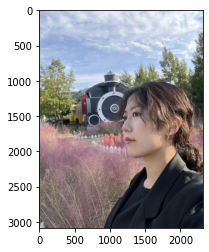

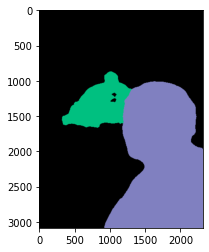

(3085, 2314)


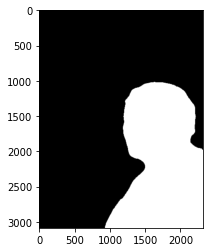

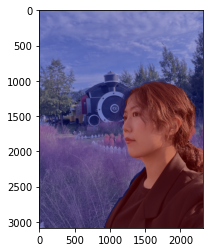

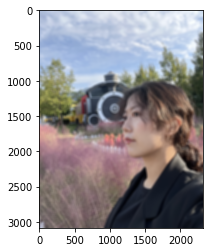

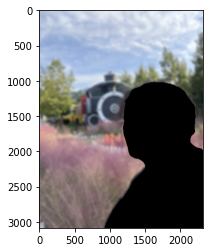

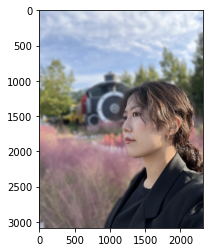

In [3]:
img_R = 'my_image.png'
portrait_mode(img_R)

(3024, 3024, 3)


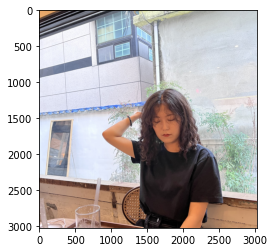

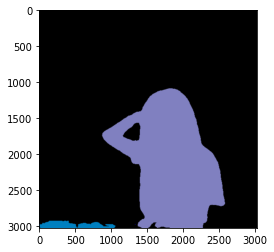

(3024, 3024)


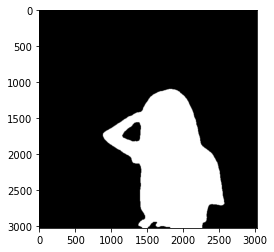

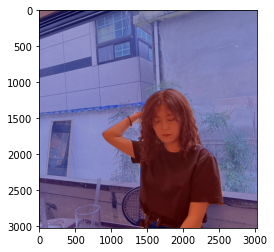

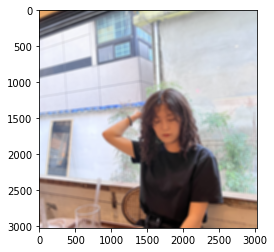

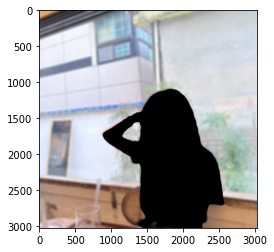

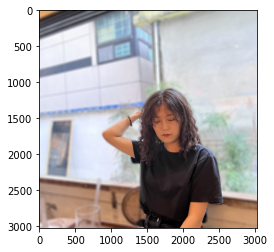

In [4]:
img_R = 'my_image3.png'
portrait_mode(img_R)

(2316, 2316, 3)


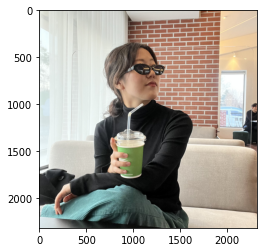

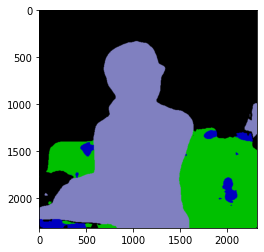

(2316, 2316)


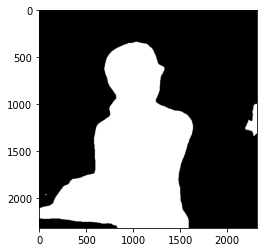

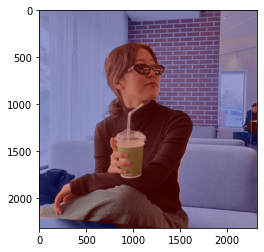

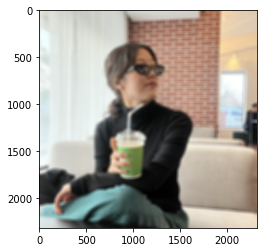

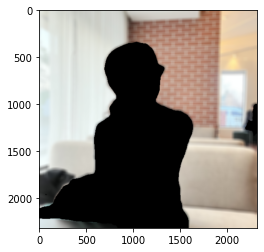

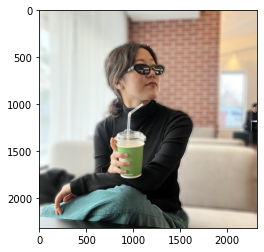

In [5]:
img_R = 'IMG_2015.png'
portrait_mode(img_R)

## 크로마키 배경 합성

In [6]:
# 배경 호주로
def portrait_mode_Back(img_R):
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'+ img_R 
    img_orig = cv2.imread(img_path) 
    img_back = cv2.imread('images/IMG_9609.png')

    print(img_orig.shape)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 저장할 파일 이름을 결정합니다
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

    # PixelLib가 제공하는 모델의 url입니다
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
    urllib.request.urlretrieve(model_url, model_file)
    
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    
    # PASCAL VOC 데이터로 학습된 모델을 이용한다
    segvalues, output = model.segmentAsPascalvoc(img_path)
    plt.imshow(output)
    plt.show()
    
#     # PASCAL VOC 데이터의 라벨 종류
#     LABEL_NAMES = [
#     'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
#     'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#     'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
#     ]
    
#     # 모델에서 나온 출력값 확인
#     plt.imshow(output)
#     plt.show()
    
#     # 라벨 확인
#     for class_id in segvalues['class_ids']:
#         print(LABEL_NAMES[class_id])
    
    # 물체마다 output에 어떤 색상으로 나타나는지 확인
    colormap = np.zeros((256, 3), dtype = int)
#     ind = np.arange(256, dtype=int)

#     for shift in reversed(range(8)):
#         for channel in range(3):
#             colormap[:, channel] |= ((ind >> channel) & 1) << shift
#         ind >>= 3

#     print(colormap[15])

    # output 이미지 : 사람
    # BGR 순서로 채널 배치됨 [192 128 128]
    # 색상값 순서 RGB로 바꾸기
    # seg_color = colormap[15].reshape(2,1,0) -> error 난다
    #  위에 코드 에러 ->cannot reshape array of size 3 into shape (2,1,0)
    seg_color = (128, 128, 192)
    
    # seg_color로만 이루어진 마스크를 만들어 보자
    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    seg_map = np.all(output==seg_color, axis=-1)
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()
    
    # 원래 이미지와 겹쳐보기
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 배경 흐리게 만들기
    # (15,15) : blurring kernel size
    img_orig_blur = cv2.blur(img_orig, (40,40))  
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 배경과 원본 영상 합성
    img_back = cv2.resize(img_back,(3024,3024))
    img_concat = np.where(img_mask_color==255, img_orig, img_back)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

(3024, 3024, 3)


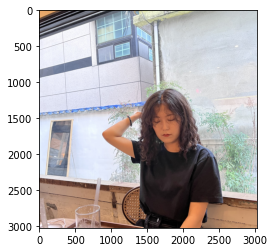

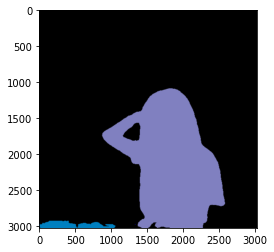

(3024, 3024)


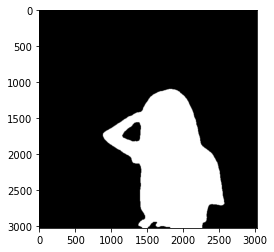

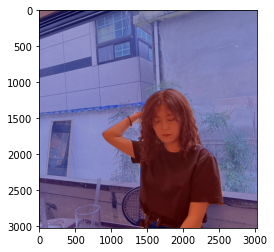

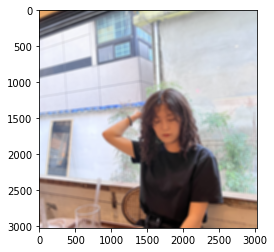

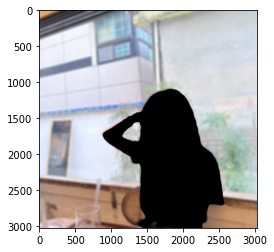

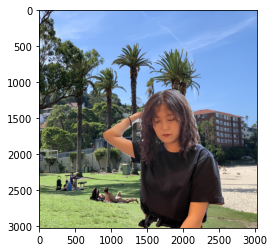

In [7]:
img_R = 'my_image3.png'
portrait_mode_Back(img_R)

## 고양이 - 인물사진 모드 함수

In [8]:
def portrait_mode_cat(img_R):
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'+ img_R 
    img_orig = cv2.imread(img_path) 

    print(img_orig.shape)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 저장할 파일 이름을 결정합니다
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

    # PixelLib가 제공하는 모델의 url입니다
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
    urllib.request.urlretrieve(model_url, model_file)
    
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    
    # PASCAL VOC 데이터로 학습된 모델을 이용한다
    segvalues, output = model.segmentAsPascalvoc(img_path)
    plt.imshow(output)
    plt.show()

    # output 이미지 : 고양이 = colormap[8]
    # BGR 순서로 채널 배치됨 [64,   0,   0]
    # 색상값 순서 RGB로 바꾸기
    # seg_color = colormap[15].reshape(2,1,0) -> error 난다
    #  위에 코드 에러 ->cannot reshape array of size 3 into shape (2,1,0)
    seg_color = (0, 0, 64)
    
    # seg_color로만 이루어진 마스크를 만들어 보자
    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    seg_map = np.all(output==seg_color, axis=-1)
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()
    
    # 원래 이미지와 겹쳐보기
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255

    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 배경 흐리게 만들기
    # (15,15) : blurring kernel size
    img_orig_blur = cv2.blur(img_orig, (40,40))  
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 흐린 배경과 원본 영상 합성
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

(4032, 3024, 3)


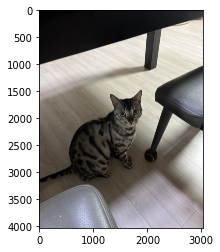

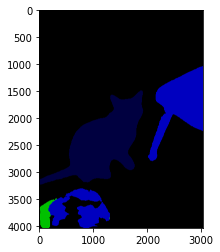

(4032, 3024)


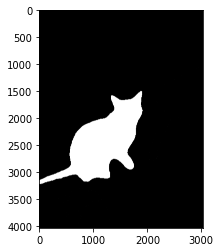

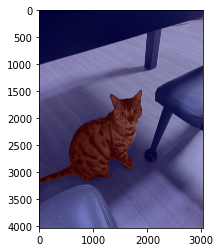

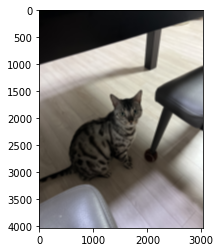

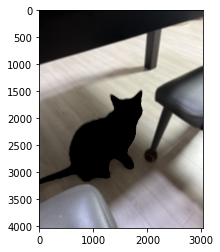

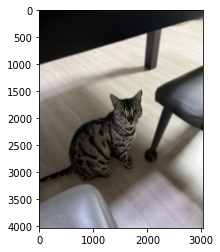

In [9]:
img_R = 'my_cat.png'
portrait_mode_cat(img_R)

(4032, 3024, 3)


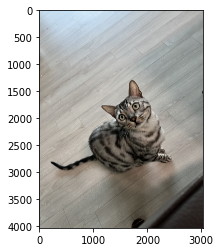

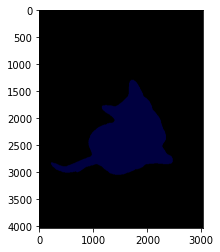

(4032, 3024)


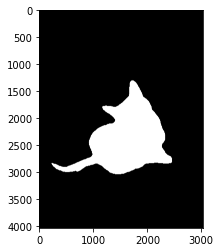

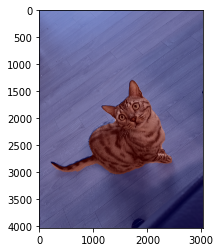

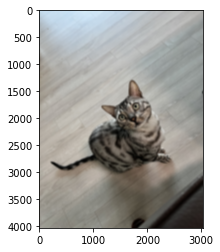

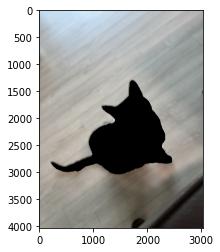

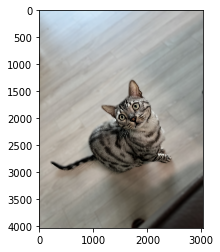

In [10]:
img_R = 'IMG_1861.png'
portrait_mode_cat(img_R)

(361, 640, 3)


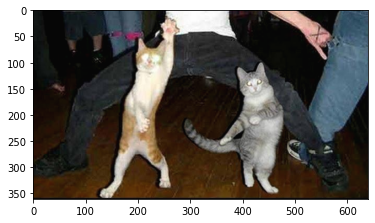

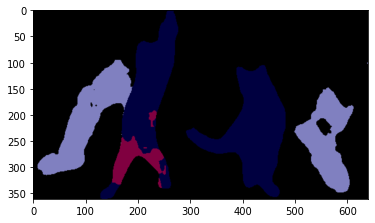

(361, 640)


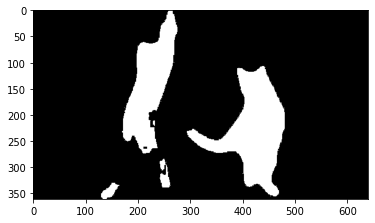

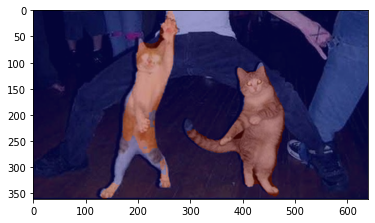

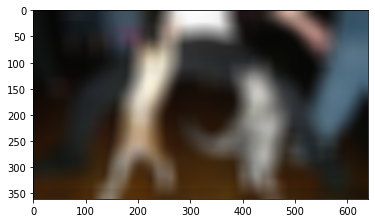

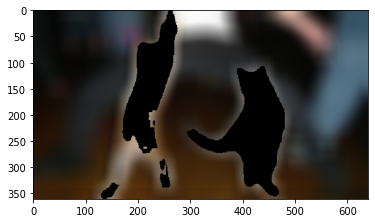

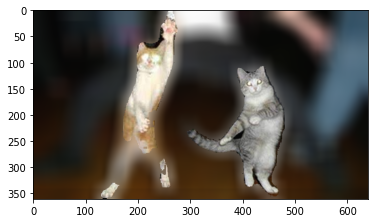

In [11]:
img_R = 'cats.png'
portrait_mode_cat(img_R)

## 회고
- 크로마키 합성으로라도 여행을 가고 싶었는데 사진 자체가 멀어서 그런지 합성이 좀 어색하다
- 나중에 크로마키로 자연스럽게 베트남 여행을 보내봐야겠다
- 화질이 안좋고 고양이가 여러 마리일때 객체 인식이 잘 안되는듯 하다